<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/feature_corr_%EC%83%81%EA%B4%80%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import os
import warnings
import matplotlib as mpl

In [ ]:
!cd /content/drive/MyDrive/"Colab Notebooks"/python_test_with_colab/"data anaylsis"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/python_test_with_colab/data anaylsis/train2.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
df.columns = ['NaN', 'id','Gender','Lenght','Diameter',
             'Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight','Target']

In [ ]:
df.head()

,NaN,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NaN             1127 non-null   int64  
 1   id              1127 non-null   int64  
 2   Gender          1127 non-null   object 
 3   Lenght          1127 non-null   float64
 4   Diameter        1127 non-null   float64
 5   Height          1127 non-null   float64
 6   Whole Weight    1127 non-null   float64
 7   Shucked Weight  1127 non-null   float64
 8   Viscra Weight   1127 non-null   float64
 9   Shell Weight    1127 non-null   float64
 10  Target          1127 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 97.0+ KB


In [ ]:
df.describe()

,NaN,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,625.349601,626.349601,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,363.756770,363.756770,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.000000,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,312.500000,313.500000,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,623.000000,624.000000,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,939.500000,940.500000,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,1252.000000,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df_de=df.describe()

In [ ]:
df_de

,NaN,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,625.349601,626.349601,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,363.756770,363.756770,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.000000,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,312.500000,313.500000,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,623.000000,624.000000,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,939.500000,940.500000,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,1252.000000,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df_des = df_de.drop(index='count')

In [ ]:
df_des = df_des[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']]

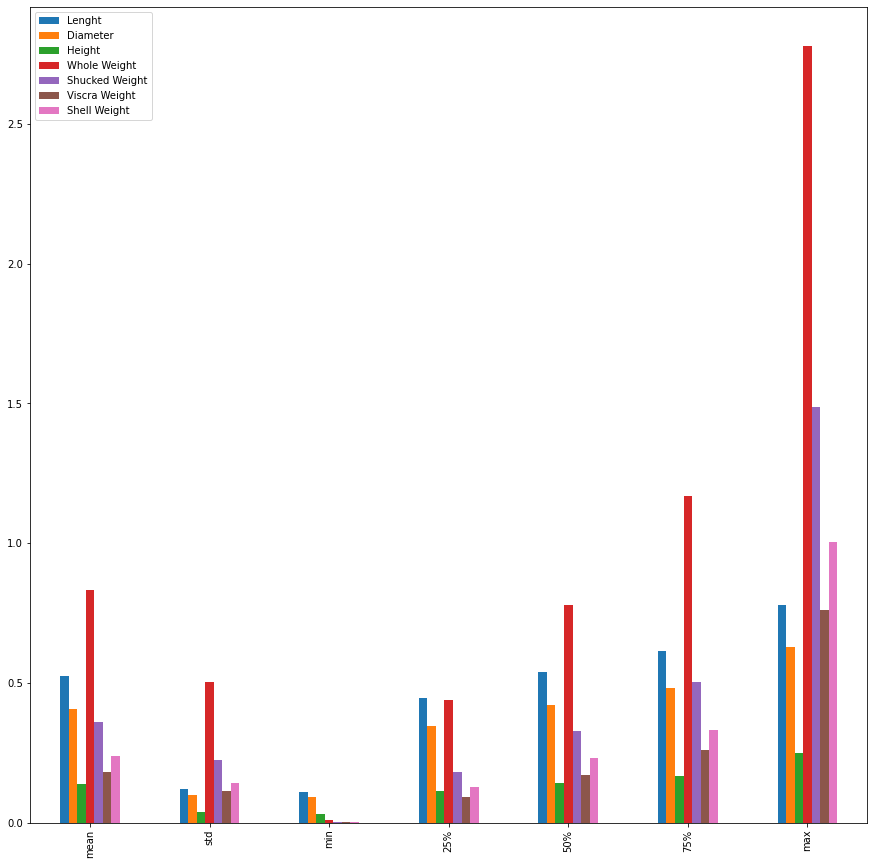

In [ ]:
df_des.plot.bar(figsize=(15,15))

In [ ]:
df_max = df[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']].max()

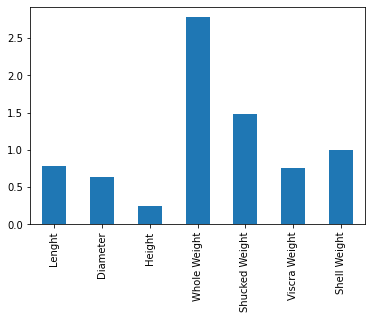

In [ ]:
df_max.plot.bar()

In [ ]:
df_min = df[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']].min()

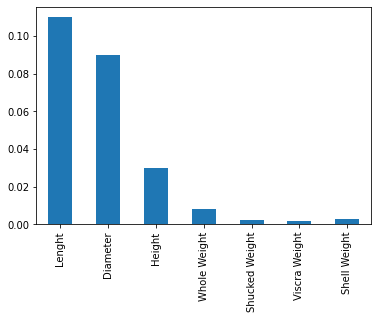

In [ ]:
df_min.plot.bar()

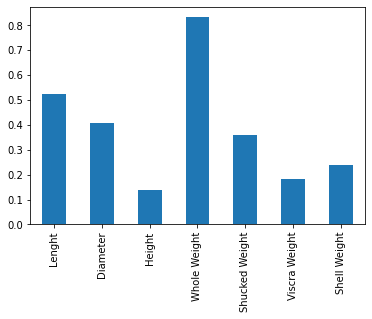

In [ ]:
df_mean=df[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']].mean()
df_mean.plot.bar()

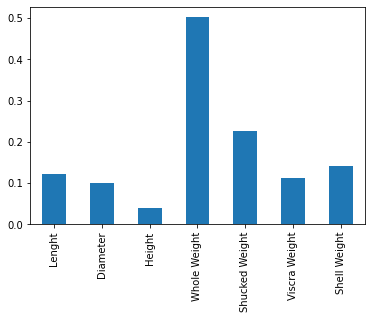

In [ ]:
df_std=df[['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']].std()
df_std.plot.bar()

In [ ]:
df_max

Lenght            0.7800
Diameter          0.6300
Height            0.2500
Whole Weight      2.7795
Shucked Weight    1.4880
Viscra Weight     0.7600
Shell Weight      1.0050
dtype: float64

In [ ]:
df

,NaN,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9
...,...,...,...,...,...,...,...,...,...,...,...
1122,912,913,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12
1123,26,27,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10
1124,16,17,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6
1125,456,457,F,0.590,0.455,0.150,0.9760,0.4650,0.2055,0.2765,10


In [ ]:
dfg = df.groupby('Gender').Lenght.describe()

In [ ]:
dfg

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,344.0,0.578605,0.087516,0.290,0.525,0.590,0.64000,0.780
I,365.0,0.431082,0.109195,0.110,0.360,0.435,0.52000,0.725
M,418.0,0.557297,0.108445,0.155,0.495,0.580,0.63375,0.775


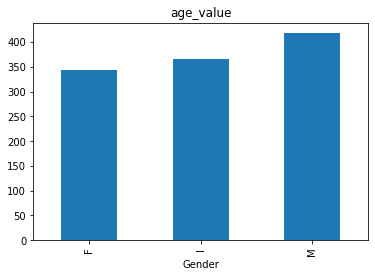

In [ ]:
dfg['count'].plot.bar(title='age_value')

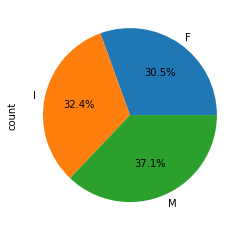

In [ ]:
dfg['count'].plot.pie(autopct='%.1f%%')

In [ ]:
dfg = dfg.drop(['count'], axis=1)

In [ ]:
dfg

,mean,std,min,25%,50%,75%,max
Gender,,,,,,,
F,0.578605,0.087516,0.290,0.525,0.590,0.64000,0.780
I,0.431082,0.109195,0.110,0.360,0.435,0.52000,0.725
M,0.557297,0.108445,0.155,0.495,0.580,0.63375,0.775


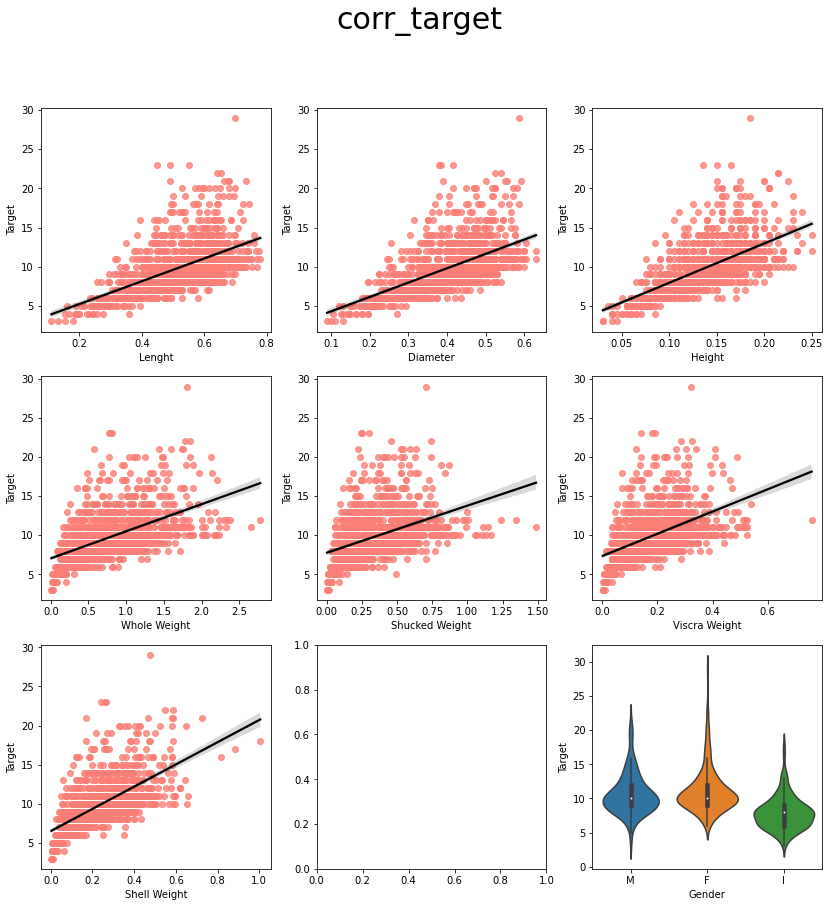

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("corr_target", fontsize=30)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = df)
    else:
        sns.regplot(x = xstr, y = 'Target', data = df, ax = ax[yvalue][xvalue], scatter_kws={"color": "#FC7F77"}, line_kws={"color": "black"})
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [ ]:
dfg.plot.bar(figsize=(15,15), title='value')